## Instructions to follow:

- Please include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set (if available) into a **datasets** folder.
- Put your images (if available) into an **img** folder.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.

In [74]:
# Import libraries
import pandas as pd
# used in B) for splitting the data set
from sklearn.model_selection import train_test_split
# used in C) for drawing the histogram
import matplotlib.pyplot as plt
# used in D) for imputing the missing values
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
# used in E) for creating the pipelines
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

**Q1)**  The **INSURANCE** dataset comprises 1,338 records related to medical insurance. The _target variable_ is the individual medical costs billed by health insurance, denoted as _charges_. The remaining columns encompass personal details, including _age_, _gender_, _bmi_, _number of children_, and _smoking status_.

**a)**  Load the data set, inspect its size and variable types, and investigate the presence of missing values.

**ANSWER IS HERE**

In [75]:
# Open the data set
raw_data = pd.read_csv('insurance_miss.csv')
raw_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,NaN,0,yes,4.371428e+06
1,18,male,33.770,1,no,7.736119e+06
2,28,male,33.000,3,no,7.220400e+06
3,33,male,22.705,0,no,2.363668e+06
4,32,male,28.880,0,no,4.846378e+06


In [76]:
# Check the size of the data set
raw_data.shape

(1338, 6)

In [77]:
# Check the data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1071 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [78]:
# Check the missing values & their counts
raw_data.isnull().sum()

age           0
sex           0
bmi         267
children      0
smoker        0
charges       0
dtype: int64

**b)** We aim to develop a multiple linear regression model predicting _charges_ based on features such as _age_, _gender_, _bmi_, _number of children_, and _smoking status_. Arrange your _feature matrix_ and _target vector_ accordingly. Split your _feature matrix_ and _target vector_ into test and train sets with a splitting ratio of _0.2_ and _random_state=1773_.

**ANSWER IS HERE**

In [79]:
# Arrange the feature matrix and target vector
features_X = raw_data.drop('charges', axis=1)
target_y = raw_data['charges']

In [80]:
# Split the data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_X, target_y,
                                                    test_size=0.2,
                                                    random_state=1773)

In [81]:
# Check the size of the train and test sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1070, 5) (1070,)
(268, 5) (268,)


**c)** Draw a histogram for the bmi variable and provide comment on its distribution.

**ANSWER IS HERE**

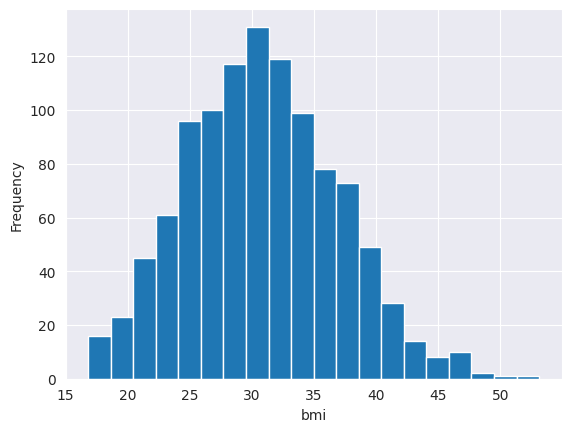

In [82]:
# Draw a histogram for the bmi variable
plt.hist(raw_data['bmi'], bins=20)
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.show()

In [83]:
# Check the descriptive statistics of the bmi variable
raw_data['bmi'].describe()

count    1071.000000
mean       30.806783
std         6.084995
min        16.815000
25%        26.457500
50%        30.500000
75%        34.832500
max        53.130000
Name: bmi, dtype: float64

Comment on the distribution of the bmi variable:
The distribution of the bmi variable is approximately normal. The mean and median are close to each other. The standard deviation is relatively small. The minimum and maximum values are not too far from the mean, only a few large values can be an outlier. The histogram is almost symmetric. 

**d)** Identify the numerical features and categorical features in your data and create three different **ColumnTransformer** for pre-processing, where numerical features are imputed with:

1) SimpleImputer(strategy='mean')
2) SimpleImputer(strategy='median')
3) KNNImputer(n_neighbors=3), respectively, 

and binary feautures are encoded with **OneHotEncoder** only.

**ANSWER IS HERE**

In [84]:
# Identify the numerical features and categorical features
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker']

In [85]:
# Create the first ColumnTransformer
ct1 = ColumnTransformer([
    ('imputer', SimpleImputer(strategy='mean'), numerical_features),
    ('encoder', OneHotEncoder(), categorical_features)
], remainder='passthrough')

In [86]:
# Create the second ColumnTransformer
ct2 = ColumnTransformer([
    ('imputer', SimpleImputer(strategy='median'), numerical_features),
    ('encoder', OneHotEncoder(), categorical_features)
], remainder='passthrough')

In [87]:
# Create the third ColumnTransformer
ct3 = ColumnTransformer([
    ('imputer', KNNImputer(n_neighbors=3), numerical_features),
    ('encoder', OneHotEncoder(), categorical_features)
], remainder='passthrough')

**e)** Create a pipeline for each pre-processor, integrating it with a linear regression model as the final estimator.

**ANSWER IS HERE**

In [88]:
# Create the first pipeline
pipe1 = Pipeline([
    ('preprocessor', ct1),
    ('regressor', LinearRegression())
])

In [89]:
# Create the second pipeline
pipe2 = Pipeline([
    ('preprocessor', ct2),
    ('regressor', LinearRegression())
])

In [90]:
# Create the third pipeline
pipe3 = Pipeline([
    ('preprocessor', ct3),
    ('regressor', LinearRegression())
])

**f)** Calculate and report the $R^2$ values for each constructed model on both the training and testing data sets. 

**ANSWER IS HERE**

In [91]:
# Fit the pipelines
pipe1.fit(X_train, y_train)
pipe2.fit(X_train, y_train)
pipe3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  KNNImputer(n_neighbors=3),
                                                  ['age', 'bmi', 'children']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['sex', 'smoker'])])),
                ('regressor', LinearRegression())])

In [92]:
# Calculate the R^2 values for each constructed model on the training data set
print('R^2 for the first model on the training data set: {:.3f}'.format(pipe1.score(X_train, y_train)))
print('R^2 for the second model on the training data set: {:.3f}'.format(pipe2.score(X_train, y_train)))
print('R^2 for the third model on the training data set: {:.3f}'.format(pipe3.score(X_train, y_train)))

R^2 for the first model on the training data set: 0.770
R^2 for the second model on the training data set: 0.773
R^2 for the third model on the training data set: 0.704


**g)** Analyze and compare the obtained results. Why do the first two models have similar performance? How can the performance of the last model be improved?

**ANSWER IS HERE**

The first two models have similar performance because they both use same imputation method, which is filling the missing values with the mean or median of the columnn and mean and median values are close to each other. The third model uses the KNNImputer to impute the missing values. The performance of the last model can be improved by increasing the number of neighbors in the KNNImputer. It will make the imputation selection more accurate ,thus missing values will be filled with more related values among the neighbors and it avoids the risk of overfitting.